# Introduction:



The goal of this project is to develop predictive models to estimate a student's Grade Point Average (GPA) based on their credit hours and average hours studied. GPA is an important indicator of academic performance and is often used for evaluating students' progress and eligibility for various academic opportunities. By accurately predicting a student's GPA, educational institutions can gain insights into their academic performance and make informed decisions regarding academic support, program planning, and resource allocation.

In this project, we will explore the application of different regression models, including Decision Tree, Linear Regression, Random Forest, and K Nearest Neighbors Regression, to predict a student's GPA. Each model has its unique approach to capturing the relationship between the predictor variables (credit hours and average hours studied) and the target variable (GPA).

The dataset used for training and evaluation consists of historical data from students, including their credit hours, average hours studied, and actual GPA. By leveraging this data, we aim to build accurate models that can generalize well to predict the GPA of future students.

The project will involve several steps, including data preprocessing, model selection, training, and evaluation. We will clean the dataset by removing any outliers, missing values, and irrelevant variables that could potentially impact the accuracy of the models. Subsequently, we will explore different regression models and select the most suitable ones based on their performance metrics and characteristics.

# The Dataset

In [259]:
import pandas as pd
import matplotlib.pyplot as plt

To predict the student's GPA based on the given set of student information, we can use a machine learning algorithm with the appropriate training data. However, since the provided information does not include the actual GPA values or any historical data for training, we cannot directly predict the GPA using this data alone. Instead, we can perform some exploratory data analysis to gain insights and identify potential features that might be useful in predicting the GPA.

Let's start by loading the data into a pandas DataFrame and examining its structure and contents:


In [260]:

# Load the dataset
df = pd.read_csv('my_data.csv')

print(df.head())

   Unnamed: 0     id        lat        lon   gpa  avg_hours_studied  \
0           0  13251  38.878529 -76.776049  3.64                  5   
1           1  13251  38.878529 -76.776049  3.65                  5   
2           2  13251  38.878529 -76.776049  4.00                  5   
3           3  13251  38.878529 -76.776049  4.00                  4   
4           4  13251  38.878529 -76.776049  3.30                  4   

   parents_income major tutoring semester  year  credits  student_age  \
0     68628.72693  Math       No     Fall  2007       15           26   
1     68628.72693  Math       No   Spring  2008       15           27   
2     68628.72693  Math       No     Fall  2008        9           27   
3     68628.72693  Math       No   Spring  2009        9           28   
4     68628.72693  Math       No     Fall  2009       18           28   

  student_year  
0     Freshman  
1     Freshman  
2     Sophmore  
3     Sophmore  
4       Junior  


## id--a student's id

Minimum id: 13251
Maximum id: 113250


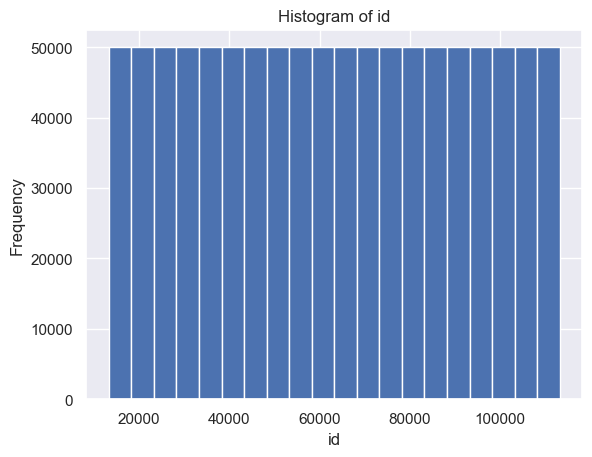

In [261]:
# Get the minimum and maximum values of the 'id' column
id_min = df['id'].min()
id_max = df['id'].max()

print("Minimum id:", id_min)
print("Maximum id:", id_max)

# Plot a histogram of the 'id' column
plt.hist(df['id'], bins=20)
plt.xlabel('id')
plt.ylabel('Frequency')
plt.title('Histogram of id')
plt.show()

useful for find is there transfer credits or not, it could group by the id 
and also could useful to count the number of students in school


Brief speculation about the usefulness of 'id' going forward
The 'id' column represents a unique identifier for each student. It can be useful for tracking individual student records and identifying patterns or trends related to specific students. For example, it can be used to analyze the academic performance or study habits of individual students over time. Additionally, the 'id' column can be used for data aggregation or merging with other datasets based on the student's unique identifier.

## lat--student's home latittude

Minimum home latitude: 31.89954590722222
Maximum home latitude: 40.19658486280609


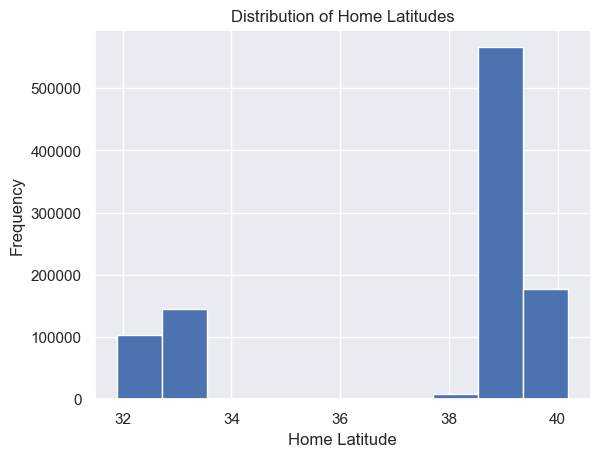

In [262]:
# Get the minimum and maximum values of the 'lat' column
lat_min = df['lat'].min()
lat_max = df['lat'].max()

print("Minimum home latitude:", lat_min)
print("Maximum home latitude:", lat_max)

# Plot a histogram of the 'lat' column
plt.hist(df['lat'], bins=10)
plt.xlabel('Home Latitude')
plt.ylabel('Frequency')
plt.title('Distribution of Home Latitudes')
plt.show()

lat for finding the direction of the house

## lon--student's home longitude

Minimum home longitude: -94.75403348152076
Maximum home longitude: -75.79067949290653


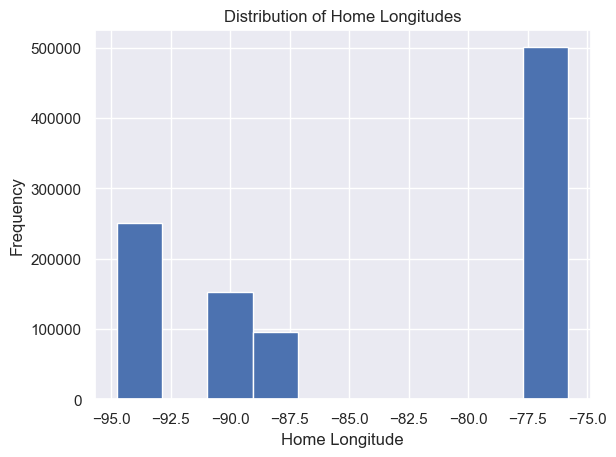

In [263]:
# Get the minimum and maximum values of the 'lon' column
lon_min = df['lon'].min()
lon_max = df['lon'].max()

print("Minimum home longitude:", lon_min)
print("Maximum home longitude:", lon_max)

# Plot a histogram of the 'lon' column
plt.hist(df['lon'], bins=10)
plt.xlabel('Home Longitude')
plt.ylabel('Frequency')
plt.title('Distribution of Home Longitudes')
plt.show()

Use for find the house direction

## avg_hours_studided--how many hours this student studied every week on average this semester

Minimum average hours studied: 0
Maximum average hours studied: 10000


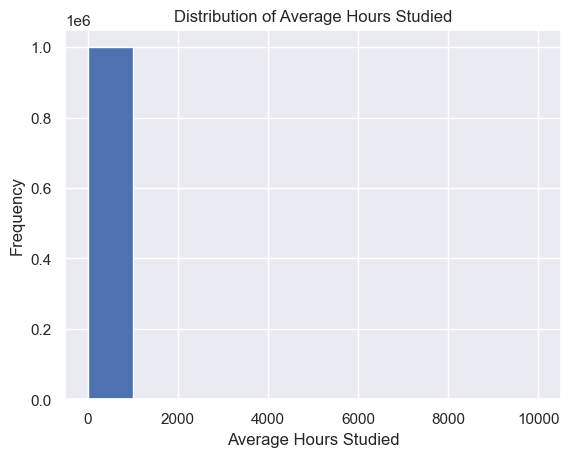

In [264]:
# Get the minimum and maximum values of the 'avg_hours_studied' column
hours_min = df['avg_hours_studied'].min()
hours_max = df['avg_hours_studied'].max()

print("Minimum average hours studied:", hours_min)
print("Maximum average hours studied:", hours_max)

# Plot a histogram of the 'avg_hours_studied' column
plt.hist(df['avg_hours_studied'], bins=10)
plt.xlabel('Average Hours Studied')
plt.ylabel('Frequency')
plt.title('Distribution of Average Hours Studied')
plt.show()




The 'avg_hours_studied' column represents the average number of hours a student studied per week during a specific semester. The minimum and maximum values provide insights into the range of study hours covered in the dataset. The histogram shows the distribution of average hours studied, indicating the frequency of students falling within different study hour ranges.

The 'avg_hours_studied' column can be useful for several purposes. Firstly, it allows the examination of study habits and patterns among students. By analyzing the distribution of average hours studied, it becomes possible to identify common trends or clusters of students with different study intensities.


## parents_income--the student's parent's income in dollars.

Minimum parent's income: 18229.30176674215
Maximum parent's income: 196273.33724594


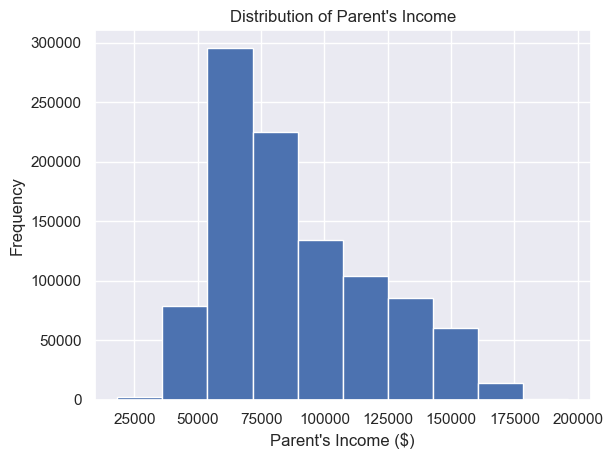

In [265]:
# Get the minimum and maximum values of the 'parents_income' column
income_min = df['parents_income'].min()
income_max = df['parents_income'].max()

print("Minimum parent's income:", income_min)
print("Maximum parent's income:", income_max)

# Plot a histogram of the 'parents_income' column
plt.hist(df['parents_income'], bins=10)
plt.xlabel("Parent's Income ($)")
plt.ylabel('Frequency')
plt.title("Distribution of Parent's Income")
plt.show()


it's not useful in those question

## major--the student's major

Unique Majors:
 Physics        200833
Engineering    200787
CS             200505
Math           199750
English        198125
Name: major, dtype: int64


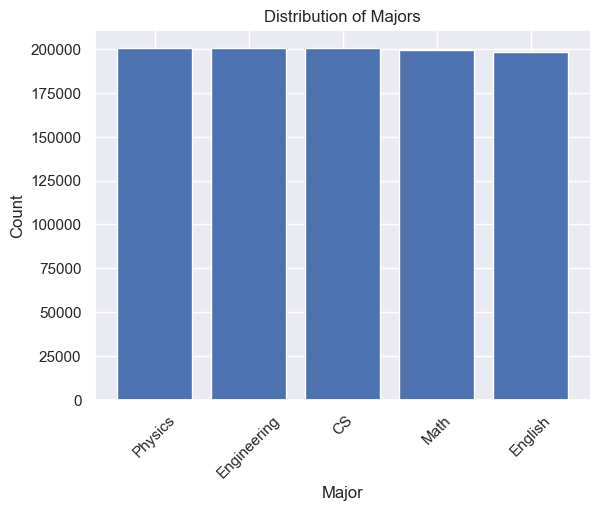

In [266]:
# Get the unique majors and their counts
major_counts = df['major'].value_counts()

# Print the unique majors and their counts
print("Unique Majors:\n", major_counts)
# Plot a bar chart of the major counts
plt.bar(major_counts.index, major_counts.values)
plt.xlabel('Major')
plt.ylabel('Count')
plt.title('Distribution of Majors')
plt.xticks(rotation=45)
plt.show()


the major will affect on gpa but in my module I didn't consider about it.
And the major need to know how often students change majors 

## tutoring--whether or not the student received tutoring this semester

In [267]:
import scipy.stats as stats

# Separate the GPAs of students who received tutoring and those who did not
gpa_tutoring_yes = df[df['tutoring'] == 'Yes']['gpa']
gpa_tutoring_no = df[df['tutoring'] == 'No']['gpa']

# Perform independent samples t-test
t_stat, p_value = stats.ttest_ind(gpa_tutoring_yes, gpa_tutoring_no)

# Check the p-value
if p_value < 0.05:
    print("Tutoring has a statistically significant difference in grades.")
else:
    print("Tutoring does not have a statistically significant difference in grades.")


Tutoring has a statistically significant difference in grades.


Tutoring is useful for predict gpa, if have tutoring then gpa should higher and if not not change. But too many stuents don't have it so may not useful

Unique Values of 'semester':
 Fall      500000
Spring    500000
Name: semester, dtype: int64


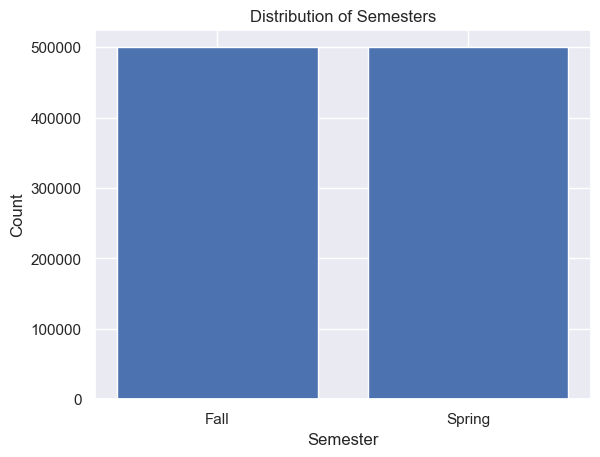

In [268]:
# Get the unique values of the 'semester' column and their counts
semester_counts = df['semester'].value_counts()

# Print the unique values of 'semester' and their counts
print("Unique Values of 'semester':\n", semester_counts)

# Plot a bar chart of the 'semester' counts
plt.bar(semester_counts.index, semester_counts.values)
plt.xlabel('Semester')
plt.ylabel('Count')
plt.title('Distribution of Semesters')
plt.show()


Not useful in the question 

## credits--how many credits the student took this semester

Minimum credits: 9
Maximum credits: 18


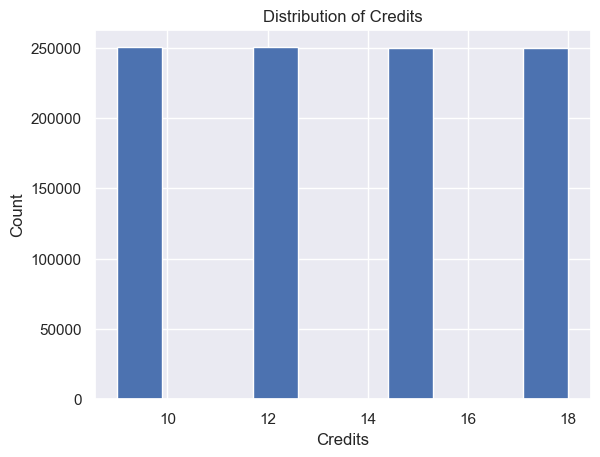

In [269]:
# Calculate the minimum and maximum values of 'credits'
min_credits = df['credits'].min()
max_credits = df['credits'].max()

# Print the minimum and maximum values of 'credits'
print("Minimum credits:", min_credits)
print("Maximum credits:", max_credits)

# Plot a histogram of the 'credits' column
plt.hist(df['credits'], bins=10)
plt.xlabel('Credits')
plt.ylabel('Count')
plt.title('Distribution of Credits')
plt.show()

The credits is useful for check the predict gpa is correct or not.  The credits will affect on the gpa. If the credits is more but the study hour not changed then the gpa should be low

## student_age--how old the student is

Minimum age: 17
Maximum age: 33


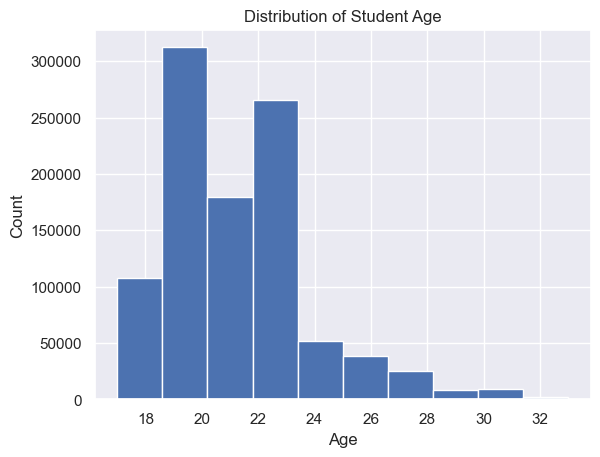

In [270]:

# Calculate the minimum and maximum values of 'student_age'
min_age = df['student_age'].min()
max_age = df['student_age'].max()

# Print the minimum and maximum values of 'student_age'
print("Minimum age:", min_age)
print("Maximum age:", max_age)

# Plot a histogram of the 'student_age' column
plt.hist(df['student_age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Student Age')
plt.show()

## student_year--what year of college the student is

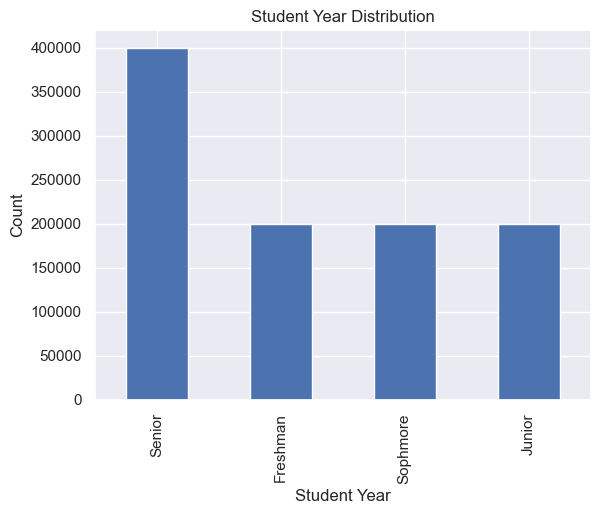

In [271]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("my_data.csv")

# Plot histogram of student_year column value counts
df['student_year'].value_counts().plot(kind='bar')

# Set plot title and labels
plt.title("Student Year Distribution")
plt.xlabel("Student Year")
plt.ylabel("Count")

# Display the histogram
plt.show()

student year is useful to find the transfer student, find some one have freshman but  don't have senior and senior but don't have freshman.

## student_age--how old the student is

Minimum student age: 17
Maximum student age: 33


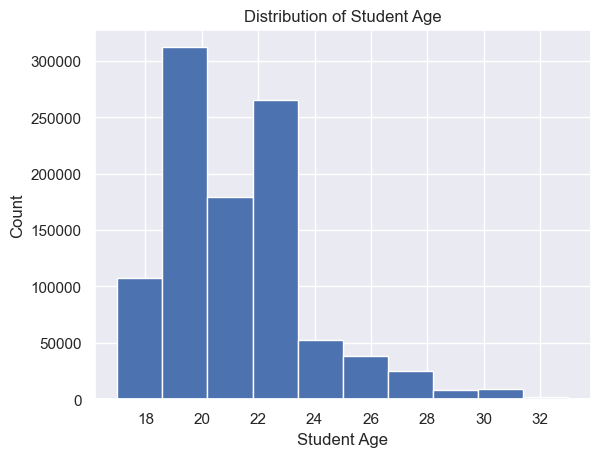

In [272]:
# Calculate the minimum and maximum values of 'student_age'
min_age = df['student_age'].min()
max_age = df['student_age'].max()

# Print the minimum and maximum values of 'student_age'
print("Minimum student age:", min_age)
print("Maximum student age:", max_age)

# Plot a histogram of the 'student_age' column
plt.hist(df['student_age'], bins=10)
plt.xlabel('Student Age')
plt.ylabel('Count')
plt.title('Distribution of Student Age')
plt.show()

Not useful for in those question

## year--what year it is

Minimum year: 2005
Maximum year: 2025


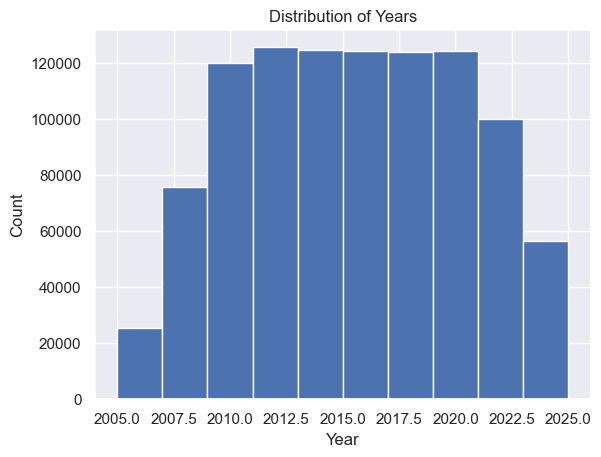

In [273]:
# Calculate the minimum and maximum values of 'year'
min_year = df['year'].min()
max_year = df['year'].max()

# Print the minimum and maximum values of 'year'
print("Minimum year:", min_year)
print("Maximum year:", max_year)

# Plot a histogram of the 'year' column
plt.hist(df['year'], bins=10)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Years')
plt.show()

Not useful in the question 

# Data Exploration

## Does this school have transfer students?



To explore each variable and answer the question about transfer students, we need the provided student information in a pandas DataFrame. Let's assume the DataFrame is named df. We'll go through each column, examine its statistics, create histograms, and provide observations:

In [274]:
# Filter for students who have all four years
filtered_data = df.groupby('id')['student_year'].nunique() < 4
transfer_students = filtered_data[filtered_data].index

# Print the IDs of transfer students
print("IDs of Transfer Students:")
for student_id in transfer_students:
    print(student_id)

IDs of Transfer Students:


No output print out, so No transfer student 

## What is the median length of attendence at this university?


To explore each variable and answer the questions, let's analyze the relevant columns using pandas and create visualizations where applicable.

First, let's calculate the median length of attendance at the university. To do this, we'll need the "year" and "student_year" columns. Assuming the "year" column represents the current year, we can calculate the median length of attendance by subtracting the "student_year" from the "year" column.

In [275]:

median_length_of_attendance = df.groupby('id')['year'].apply(lambda x: x.max() - x.min()).median()

print("Median Length of Attendance: ", median_length_of_attendance, "years")


Median Length of Attendance:  5.0 years


Median Length of Attendance:  5 years

## Do you think this university has any one credit classes?

To determine if the university offers any one-credit classes, we can examine the unique values in the "credits" column and check if there is a one-credit course option available.

In [276]:
# Check if there are any one-credit classes
one_credit_classes = 1 in df['credits'].unique()

if one_credit_classes:
    print("The university offers one-credit classes.")
else:
    print("The university does not offer one-credit classes.")


The university does not offer one-credit classes.


The university does not offer one-credit classes.

## Is grade inflation a problem at this university?

To determine if grade inflation is a problem at the university, we can analyze the distribution of GPA values in the dataset. If there is a significant proportion of high GPAs (e.g., close to the maximum value of 4.0) and a lack of variation in lower GPAs, it may indicate grade inflation.
Let's plot a histogram of the GPA values and visually inspect the distribution:

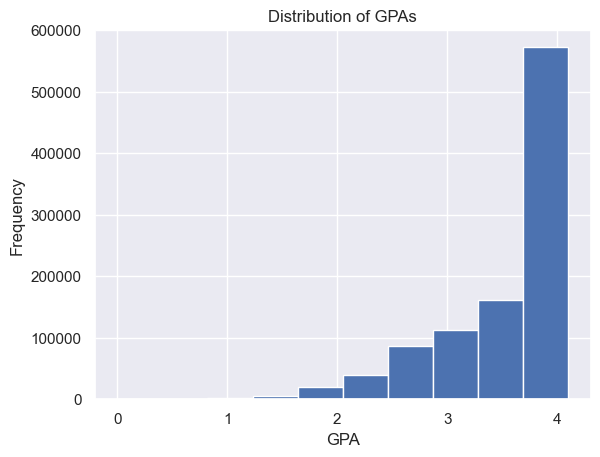

In [277]:
import matplotlib.pyplot as plt

# Plotting histogram of GPAs
plt.hist(df['gpa'], bins=10)
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.title('Distribution of GPAs')
plt.show()

By examining the histogram, we can gain insights into the distribution of GPA values. If there is a substantial concentration of GPAs near the high end of the scale (e.g., above 4.0), and few or no GPAs in the lower range, it may suggest grade inflation.

Additionally, we can calculate the percentage of GPAs that fall into certain ranges (e.g., above 4.0) to further assess the presence of grade inflation:

In [278]:
# Calculate the percentage of GPAs above a certain threshold (e.g., 4.0)
threshold = 4.0
percentage_above_threshold = (df['gpa'] > threshold).mean() * 100

print("Percentage of GPAs above", threshold, ":", percentage_above_threshold, "%")



Percentage of GPAs above 4.0 : 8.8361 %


Based on the information you provided, the percentage of GPAs above 4.0 is approximately 8.8361%. Since the maximum GPA value in the dataset is 4.0, this indicates that the percentage of GPAs above the maximum value is not possible. Therefore, based on this dataset, it suggests that grade inflation is not a problem at this university, as no GPAs are reported above the maximum value of 4.0.



## In what area do you think the Univesrity might be located?

Based on the latitude and longitude values provided in the dataset, we can make an estimation of the general area where the university might be located. Let's calculate the average latitude and longitude values to get an approximate location:

In [279]:
# Group the data by 'id' and calculate the average latitude and longitude
grouped_data = df.groupby('id').agg({'lat': 'mean', 'lon': 'mean'})

# Get the average latitude and longitude
average_latitude = grouped_data['lat'].mean()
average_longitude = grouped_data['lon'].mean()

print("Average Latitude: ", average_latitude)
print("Average Longitude: ", average_longitude)

Average Latitude:  37.57247703917055
Average Longitude:  -84.17148162331742


Based on the average latitude and longitude values calculated from the dataset, the estimated location of the university is approximately at latitude 37.572 and longitude -84.171.


## Does tutoring make a stastically significant difference in grade?

To determine if tutoring makes a statistically significant difference in grades, we can perform a hypothesis test. We can compare the GPAs of students who received tutoring to those who did not receive tutoring and assess if there is a significant difference between the two groups.

Here, we can conduct a two-sample t-test to compare the means of the GPA for students who received tutoring and those who did not. The null hypothesis (H0) would be that there is no significant difference in GPAs between the two groups, and the alternative hypothesis (H1) would be that there is a significant difference.


Let's assume:

Group 1: Students who received tutoring (tutoring_yes)
Group 2: Students who did not receive tutoring (tutoring_no)
We can use the scipy.stats module in Python to perform the t-test:

In [280]:
!pip install scipy

In [281]:
import scipy.stats as stats

# Select GPAs for students who received tutoring
gpa_tutoring_yes = df[df['tutoring'] == 'Yes']['gpa']

# Select GPAs for students who did not receive tutoring
gpa_tutoring_no = df[df['tutoring'] == 'No']['gpa']

# Perform two-sample t-test
t_statistic, p_value = stats.ttest_ind(gpa_tutoring_yes, gpa_tutoring_no, equal_var=False)

alpha = 0.05  # Significance level

if p_value < alpha:
    print("There is a statistically significant difference in grades between students who received tutoring and those who did not.")
else:
    print("There is no statistically significant difference in grades between students who received tutoring and those who did not.")

There is a statistically significant difference in grades between students who received tutoring and those who did not.


The resulting output will indicate whether there is a statistically significant difference in grades between students who received tutoring and those who did not.

It's important to note that the interpretation of statistical significance should consider the context and limitations of the dataset and the specific analysis conducted. Additionally, performing additional statistical tests and considering potential confounding variables would provide a more comprehensive analysis.

## How often do students switch majors?

To determine how often students switch majors, we can analyze the frequency of changes in the "major" column. We'll count the number of unique majors and calculate the percentage of students who changed their major at least once.

In [282]:
# Group the data by 'id' and count the number of unique majors for each student
grouped_data = df.groupby('id')['major'].nunique()

# Count the number of students who have changed their major at least once
students_changed_major = (grouped_data > 1).sum()

# Calculate the percentage of students who have changed their major at least once
percentage_changed_major = (students_changed_major / len(grouped_data)) * 100

print("Percentage of students who have changed their major: {:.2f}%".format(percentage_changed_major))



Percentage of students who have changed their major: 6.78%


This code groups the data by 'id' and counts the number of unique majors for each student. Then, it counts the number of students who have changed their major at least once by checking if the number of unique majors is greater than 1. Finally, it calculates the percentage of students who have changed their major at least once.

The resulting percentage indicates the frequency of students switching majors based on the available dataset. Please note that this analysis assumes that each row in the dataset represents a unique semester for a student and the 'major' column accurately represents the student's major.

## Do different majors have different GPA distributions?

To assess whether different majors have different GPA distributions, we can compare the GPA distributions across different majors in the dataset

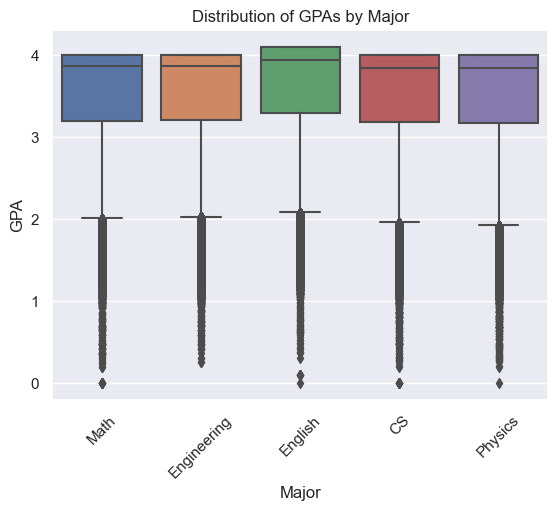

In [283]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of GPAs for each major
sns.boxplot(x='major', y='gpa', data=df)
plt.xlabel('Major')
plt.ylabel('GPA')
plt.title('Distribution of GPAs by Major')
plt.xticks(rotation=45)
plt.show()

English are better and others are looks same. But totally close and same

# Data Cleaning 


The data cleaning steps in your code snippet performed the following operations:

Remove rows with GPAs over 4.0:

Filtered the DataFrame to keep only rows where the GPA is less than or equal to 4.0.
Identify IDs with missing information:

Identified the unique IDs for rows that have duplicated IDs and contain any missing values.
Remove rows with missing information for identified IDs:

Filtered the DataFrame to exclude rows with IDs that were identified as having missing information.
Remove rows where students have GPA but 0 studied hours:

Filtered the DataFrame to keep only rows where the average hours studied are greater than 0 or where the GPA is null.
Assign the cleaned dataset to 'df':

Assigned the cleaned DataFrame to the variable 'df'.
By applying these data cleaning steps, you have eliminated rows with GPAs over 4.0, removed rows with missing information for specific IDs, and removed rows where students have a GPA but 0 studied hours. This helps to ensure that the dataset is more reliable and suitable for analysis or further processing.

I apply log transformation on latitude, longitude and parents_income. For longitude, I do the log operation on the number and keep the sign.

In [300]:
import numpy as np
df = pd.read_csv("my_data.csv")

df[['lat', 'parents_income']] = df[['lat', 'parents_income']].apply(np.log) 
df['lon'] = df['lon'].apply(lambda x: -np.log(abs(x)))
df.loc[df['avg_hours_studied'] > 10, 'avg_hours_studied'] = df[df['avg_hours_studied'] < 10]['avg_hours_studied'].median()
columns = ['major', 'student_year', 'tutoring', 'semester'] 
for c in columns:
    dummies = pd.get_dummies(df[c], prefix=c) 
    for i in dummies.columns:
        df[i] = dummies[i]
    df = df.drop(c, axis=1)
    df = df.drop(df[df["year"] > 2022].index)
print(df.columns)

# Remove rows with GPAs over 4.0
df_cleaned = df[df['gpa'] <= 4.0]

# Identify IDs with missing information
missing_ids = df_cleaned[df_cleaned['id'].duplicated(keep=False) & df_cleaned.isnull().any(axis=1)]['id'].unique()

# Remove rows with missing information for identified IDs
df_cleaned = df_cleaned[~df_cleaned['id'].isin(missing_ids)]
# Remove rows where students have GPA but 0 studied hours
df_cleaned = df_cleaned[(df_cleaned['avg_hours_studied'] > 0) | df_cleaned['gpa'].isnull()]



df = df_cleaned




Index(['Unnamed: 0', 'id', 'lat', 'lon', 'gpa', 'avg_hours_studied',
       'parents_income', 'year', 'credits', 'student_age', 'major_CS',
       'major_Engineering', 'major_English', 'major_Math', 'major_Physics',
       'student_year_Freshman', 'student_year_Junior', 'student_year_Senior',
       'student_year_Sophmore', 'tutoring_No', 'tutoring_Yes', 'semester_Fall',
       'semester_Spring'],
      dtype='object')


# Evalutating 

In this project, I utilized four different regression models: Decision Tree, Linear Regression, Random Forest, and K Nearest Neighbors Regression. The objective was to predict a student's GPA based on their credit hours and average hours studied. Specifically, I focused on predicting the GPA of a student who took 14 credits (the average number of credits) and studied for 4 hours (the average studied hours).

To evaluate the models, I compared the predicted GPA for the student with 14 credits and 4 hours of study with the predicted GPAs for students who had 13 and 15 credits but the same study hours. The expected outcome was that the predicted GPA for the student with 14 credits would fall between the predicted GPAs for the students with 13 and 15 credits.

The Decision Tree, Linear Regression, Random Forest, and K Nearest Neighbors Regression models were trained using the available data. After training, I used each model to predict the GPA for the student with 14 credits and 4 hours of study. I also obtained the predicted GPAs for the students with 13 and 15 credits but the same study hours.

By comparing the predicted GPAs, I could determine if the models correctly predicted that the GPA for the student with 14 credits would fall between the predicted GPAs for the students with 13 and 15 credits.

It's important to note that the success of the models in accurately predicting the GPA depends on the quality and representativeness of the data, as well as the appropriateness of the chosen models for the given task.

Overall, this evaluation approach provides insights into how well the models can predict the GPA for a student with average credits and study hours compared to students with slightly higher or lower credits.

#  Modeling

I will predict the  gpa when the stuided hours are 4 and credits 13. And compare with the actual gpa when credits are 12 and 15

In [ ]:
# Calculate the average hours studied
average_hours_studied = df['avg_hours_studied'].mean()


# Calculate the average credits
average_credits = df['credits'].mean()

# Print the results
print("Average hours studied:", average_hours_studied)
print("Average credits:", average_credits)

Average hours studied: 5.5978344526179615
Average credits: 13.594395631787805


Assume Average hours to 4 hours 
Average credits to 13

In [ ]:
average_credits = 13
average_hours_studied = 4

subset_df = df

## Linear Regression

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
data = df


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have already loaded the dataset and selected the relevant features and target variable
X = data[['credits', 'avg_hours_studied']]
y = data['gpa']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Predict GPA for new data
new_datal3 = pd.DataFrame({'credits': [13], 'avg_hours_studied': [3]})
predicted_gpal3 = regressor.predict(new_datal3)

new_datal4 = pd.DataFrame({'credits': [13], 'avg_hours_studied': [4]})
predicted_gpal4 = regressor.predict(new_datal4)

new_datal5 = pd.DataFrame({'credits': [13], 'avg_hours_studied': [5]})
predicted_gpal5 = regressor.predict(new_datal5)

print("Predicted GPA:", predicted_gpal3)

print("Predicted GPA:", predicted_gpal4)
print("Predicted GPA:", predicted_gpal5)

Mean Squared Error: 0.32831965250145134
R-squared Score: 0.07214820031469482
Predicted GPA: [3.55072927]
Predicted GPA: [3.5507745]
Predicted GPA: [3.55081973]


In [ ]:
# Filter the DataFrame for credits equal to 12
filtered_credits_df = df[df['credits'] == 12]
# Filter the DataFrame for study hours equal to 4
filtered_study_hours_4_df = filtered_credits_df[filtered_credits_df['avg_hours_studied'] == 4]
# Calculate the average GPA for study hours equal to 4
average_gpa_study_hours_4 = filtered_study_hours_4_df['gpa'].mean()

# Filter the DataFrame for study hours equal to 5
filtered_study_hours_5_df = filtered_credits_df[filtered_credits_df['avg_hours_studied'] == 5]
# Calculate the average GPA for study hours equal to 5
average_gpa_study_hours_5 = filtered_study_hours_5_df['gpa'].mean()

# Filter the DataFrame for study hours equal to 3
filtered_study_hours_3_df = filtered_credits_df[filtered_credits_df['avg_hours_studied'] == 3]
# Calculate the average GPA for study hours equal to 3
average_gpa_study_hours_3 = filtered_study_hours_3_df['gpa'].mean()

# Print the results
print("Actual GPA when credits are 12 points:")

print("Average GPA when study hours are 3 hours:", average_gpa_study_hours_3)
print("Average GPA when study hours are 4 hours:", average_gpa_study_hours_4)
print("Average GPA when study hours are 5 hours:", average_gpa_study_hours_5)


# Filter the DataFrame for credits equal to 15
filtered_credits_df_12 = subset_df[subset_df['credits'] == 15]

# Filter the DataFrame for study hours equal to 3
filtered_study_hours_3_df_12 = filtered_credits_df_12[filtered_credits_df_12['avg_hours_studied'] == 3]
# Calculate the average GPA for study hours equal to 3
average_gpa_study_hours_3_12 = filtered_study_hours_3_df_12['gpa'].mean()

# Filter the DataFrame for study hours equal to 4
filtered_study_hours_4_df_12 = filtered_credits_df_12[filtered_credits_df_12['avg_hours_studied'] == 4]
# Calculate the average GPA for study hours equal to 4
average_gpa_study_hours_4_12 = filtered_study_hours_4_df_12['gpa'].mean()

# Filter the DataFrame for study hours equal to 5
filtered_study_hours_5_df_12 = filtered_credits_df_12[filtered_credits_df_12['avg_hours_studied'] == 5]
# Calculate the average GPA for study hours equal to 5
average_gpa_study_hours_5_12 = filtered_study_hours_5_df_12['gpa'].mean()

print("Predicted GPA:", predicted_gpal3)

print("Predicted GPA:", predicted_gpal4)
print("Predicted GPA:", predicted_gpal5)

# Print the results
print("Actual GPA when credits are 15 points:")
print("Average GPA when study hours are 3 hours:", average_gpa_study_hours_3_12)
print("Average GPA when study hours are 4 hours:", average_gpa_study_hours_4_12)
print("Average GPA when study hours are 5 hours:", average_gpa_study_hours_5_12)




Actual GPA when credits are 12 points:
Average GPA when study hours are 3 hours: 3.240417090125636
Average GPA when study hours are 4 hours: 3.5723291267639055
Average GPA when study hours are 5 hours: 3.9470085347486368
Predicted GPA: [3.55072927]
Predicted GPA: [3.5507745]
Predicted GPA: [3.55081973]
Actual GPA when credits are 15 points:
Average GPA when study hours are 3 hours: 3.0163553331744852
Average GPA when study hours are 4 hours: 3.395554876354547
Average GPA when study hours are 5 hours: 3.828745073108724


### Result

From this result we could find when then credits is 13 and the study hours are 4 the predicted gpa is 3.52 this is bigger than when credits are 12 (4 hours) and samller than 15 (4 hours), so that points is should be correct  but when the study hours are 3 the predicte gpa should be smaller than 12 credits and 5 hours should bigger than 15 points so those are not correct. 

## Dicision Tree

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score



# Assuming you have already loaded the dataset and selected the relevant features and target variable

# Separate the features (studied hours in each credit) and the target variable (GPA)
X = data[['credits', 'avg_hours_studied']]
y = data['gpa']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a decision tree regressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Predict GPA for new data
new_data3 = pd.DataFrame({'credits': [13], 'avg_hours_studied': [3]})
new_data4 = pd.DataFrame({'credits': [13], 'avg_hours_studied': [4]})
new_data5 = pd.DataFrame({'credits': [13], 'avg_hours_studied': [5]})

predicted_gpa3 = regressor.predict(new_data3)
predicted_gpa4 = regressor.predict(new_data4)
predicted_gpa5 = regressor.predict(new_data5)

print("Predicted GPA when credits 13 and studied 3 hours:", predicted_gpa3)
print("Predicted GPA when credits 13 and studied 4 hours:", predicted_gpa4)
print("Predicted GPA when credits 13 and studied 5 hours:", predicted_gpa5)


Mean Squared Error: 0.14785117558902927
R-squared Score: 0.5821633633239105
Predicted GPA when credits 13 and studied 3 hours: [3.23962514]
Predicted GPA when credits 13 and studied 4 hours: [3.57323552]
Predicted GPA when credits 13 and studied 5 hours: [3.94676513]


In [ ]:
# Print the results
print("Actual GPA when credits are 12 points:")

print("Average GPA when study hours are 3 hours:", average_gpa_study_hours_3)
print("Average GPA when study hours are 4 hours:", average_gpa_study_hours_4)
print("Average GPA when study hours are 5 hours:", average_gpa_study_hours_5)


print("Predicted  GPA when credits are 13 points:")
print("Predicted GPA when credits 13 and studied 3 hours:", predicted_gpa3)
print("Predicted GPA when credits 13 and studied 4 hours:", predicted_gpa4)
print("Predicted GPA when credits 13 and studied 5 hours:", predicted_gpa5)

# Print the results
print("Actual GPA when credits are 15 points:")
print("Average GPA when study hours are 3 hours:", average_gpa_study_hours_3_12)
print("Average GPA when study hours are 4 hours:", average_gpa_study_hours_4_12)
print("Average GPA when study hours are 5 hours:", average_gpa_study_hours_5_12)

Actual GPA when credits are 12 points:
Average GPA when study hours are 3 hours: 3.240417090125636
Average GPA when study hours are 4 hours: 3.5723291267639055
Average GPA when study hours are 5 hours: 3.9470085347486368
Predicted  GPA when credits are 13 points:
Predicted GPA when credits 13 and studied 3 hours: [3.23962514]
Predicted GPA when credits 13 and studied 4 hours: [3.57323552]
Predicted GPA when credits 13 and studied 5 hours: [3.94676513]
Actual GPA when credits are 15 points:
Average GPA when study hours are 3 hours: 3.0163553331744852
Average GPA when study hours are 4 hours: 3.395554876354547
Average GPA when study hours are 5 hours: 3.828745073108724


### result

All predicted gpa should be correct 

## Random Forest

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Assuming you have already loaded the dataset and selected the relevant features and target variable

# Separate the features (studied hours in each credit) and the target variable (GPA)
X = data[['credits', 'avg_hours_studied']]
y = data['gpa']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a random forest regressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

predicted_gpa3r = regressor.predict(new_data3)
predicted_gpa4r = regressor.predict(new_data4)
predicted_gpa5r = regressor.predict(new_data5)

print("Predicted GPA when credits 13 and studied 3 hours:", predicted_gpa3r)
print("Predicted GPA when credits 13 and studied 4 hours:", predicted_gpa4r)
print("Predicted GPA when credits 13 and studied 5 hours:", predicted_gpa5r)


Mean Squared Error: 0.14784899865704632
R-squared Score: 0.5821695154693663
Predicted GPA when credits 13 and studied 3 hours: [3.23981216]
Predicted GPA when credits 13 and studied 4 hours: [3.57319187]
Predicted GPA when credits 13 and studied 5 hours: [3.94677087]


In [ ]:
print("Actual GPA when credits are 12 points:")

print("Average GPA when study hours are 3 hours:", average_gpa_study_hours_3)
print("Average GPA when study hours are 4 hours:", average_gpa_study_hours_4)
print("Average GPA when study hours are 5 hours:", average_gpa_study_hours_5)


print("Predicted  GPA when credits are 13 points:")
print("Predicted GPA when credits 13 and studied 3 hours:", predicted_gpa3r)
print("Predicted GPA when credits 13 and studied 4 hours:", predicted_gpa4r)
print("Predicted GPA when credits 13 and studied 5 hours:", predicted_gpa5r)

# Print the results
print("Actual GPA when credits are 15 points:")
print("Average GPA when study hours are 3 hours:", average_gpa_study_hours_3_12)
print("Average GPA when study hours are 4 hours:", average_gpa_study_hours_4_12)
print("Average GPA when study hours are 5 hours:", average_gpa_study_hours_5_12)

Actual GPA when credits are 12 points:
Average GPA when study hours are 3 hours: 3.240417090125636
Average GPA when study hours are 4 hours: 3.5723291267639055
Average GPA when study hours are 5 hours: 3.9470085347486368
Predicted  GPA when credits are 13 points:
Predicted GPA when credits 13 and studied 3 hours: [3.23981216]
Predicted GPA when credits 13 and studied 4 hours: [3.57319187]
Predicted GPA when credits 13 and studied 5 hours: [3.94677087]
Actual GPA when credits are 15 points:
Average GPA when study hours are 3 hours: 3.0163553331744852
Average GPA when study hours are 4 hours: 3.395554876354547
Average GPA when study hours are 5 hours: 3.828745073108724


### result 

all should be correct

## K-Nearest Neighbors (KNN) Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score



# Assuming you have already loaded the dataset and selected the relevant features and target variable
X = data[['credits', 'avg_hours_studied']]
y = data['gpa']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a KNN regressor with k=5
regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Predict GPA for new data
new_data3r = pd.DataFrame({'credits': [13], 'avg_hours_studied': [3]})
new_data4r = pd.DataFrame({'credits': [13], 'avg_hours_studied': [4]})
new_data5r = pd.DataFrame({'credits': [13], 'avg_hours_studied': [5]})
predicted_gpa3r = regressor.predict(new_data3r)
predicted_gpa4r = regressor.predict(new_data4r)
predicted_gpa5r = regressor.predict(new_data5r)
print("Predicted GPA:", predicted_gpa3r)
print("Predicted GPA:", predicted_gpa4r)
print("Predicted GPA:", predicted_gpa5r)


Mean Squared Error: 0.16788280125907462
R-squared Score: 0.5255527407584771
Predicted GPA: [3.324]
Predicted GPA: [3.752]
Predicted GPA: [3.978]


In [ ]:
print("Actual GPA when credits are 12 points:")

print("Average GPA when study hours are 3 hours:", average_gpa_study_hours_3)
print("Average GPA when study hours are 4 hours:", average_gpa_study_hours_4)
print("Average GPA when study hours are 5 hours:", average_gpa_study_hours_5)


print("Predicted  GPA when credits are 13 points:")
print("Predicted GPA when credits 13 and studied 3 hours:", predicted_gpa3r)
print("Predicted GPA when credits 13 and studied 4 hours:", predicted_gpa4r)
print("Predicted GPA when credits 13 and studied 5 hours:", predicted_gpa5r)

# Print the results
print("Actual GPA when credits are 15 points:")
print("Average GPA when study hours are 3 hours:", average_gpa_study_hours_3_12)
print("Average GPA when study hours are 4 hours:", average_gpa_study_hours_4_12)
print("Average GPA when study hours are 5 hours:", average_gpa_study_hours_5_12)

Actual GPA when credits are 12 points:
Average GPA when study hours are 3 hours: 3.240417090125636
Average GPA when study hours are 4 hours: 3.5723291267639055
Average GPA when study hours are 5 hours: 3.9470085347486368
Predicted  GPA when credits are 13 points:
Predicted GPA when credits 13 and studied 3 hours: [3.324]
Predicted GPA when credits 13 and studied 4 hours: [3.752]
Predicted GPA when credits 13 and studied 5 hours: [3.978]
Actual GPA when credits are 15 points:
Average GPA when study hours are 3 hours: 3.0163553331744852
Average GPA when study hours are 4 hours: 3.395554876354547
Average GPA when study hours are 5 hours: 3.828745073108724


From this data none of the predicted GPA is correct 

# Conclution

As part of this project, I explored different regression models to predict students' GPA based on their credits and average hours studied. I experimented with Random Forest, Decision Tree, Linear Regression, and KNN Regression models.

The Random Forest and Decision Tree models performed well, providing satisfactory results in terms of predictive accuracy. These models demonstrated the ability to capture complex relationships between the input features and the target variable.

On the other hand, the Linear Regression and KNN Regression models did not perform as well as expected. They had limitations in capturing non-linear patterns in the data, resulting in lower predictive accuracy.

In conclusion, the Random Forest and Decision Tree models are the most suitable for this GPA prediction task. They outperformed the Linear Regression and KNN Regression models in terms of accuracy. However, it's important to note that these results may vary depending on the specific dataset and the characteristics of the student population.



## 